<IPython.core.display.Javascript object>


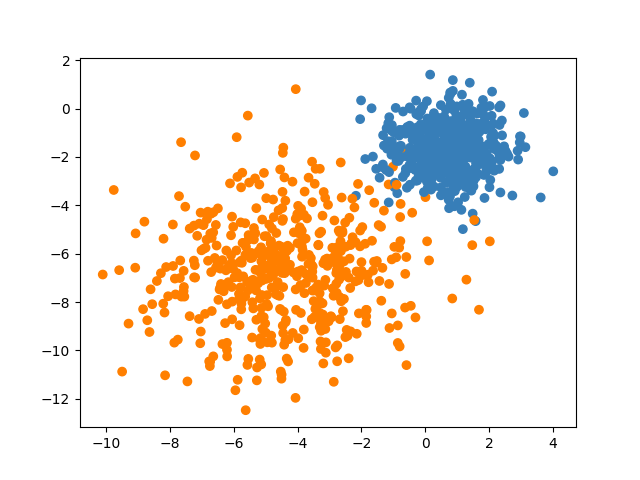

[[-1.19700069 -1.65648728]
 [ 1.07015103 -0.42022368]
 [-0.96670708 -3.24659086]
 ..., 
 [ 0.21822861 -1.66461936]
 [-3.44734765 -8.28019303]
 [-5.14997873 -5.73321067]]
[0 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 1
 0 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 1 0 1 0 0 1 0 0
 1 0 0 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 0 0 1 1 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1
 0 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1 1 0 0 0 1 1 1 0 1
 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 0 0 1
 0 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0
 1 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1
 1 1 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 0
 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 0
 0 0 

In [82]:
from sklearn import datasets
import numpy as np
varied = datasets.make_blobs(1100,centers=2,cluster_std=[1.0, 2.0])
%matplotlib notebook

import matplotlib.pyplot as plt
colors = np.array(['#377eb8', '#ff7f00'])

plt.scatter(varied[0][:1000,0],varied[0][:1000,1], color=colors[varied[1][:1000]])
Xtrain=np.array([varied[0][:1000,0],varied[0][:1000,1]]).T
Ytrain=np.array(varied[1][:1000])
Xtest=np.array([varied[0][1000:1100,0],varied[0][1000:1100,1]]).T
Ytest=np.array(varied[1][1000:1100])
print(Xtrain)
print(Ytrain)
print(Xtest)
print(Ytest)

In [85]:
from sklearn import svm
model = svm.SVC(kernel='linear', C=1) 
model.fit(Xtrain, Ytrain)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

<IPython.core.display.Javascript object>


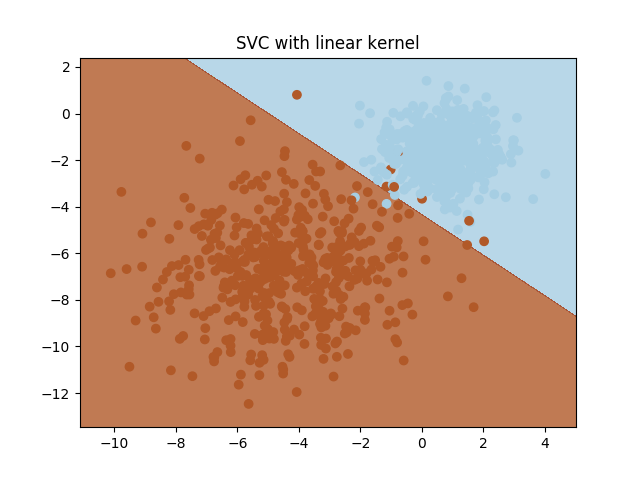

In [86]:
x_min, x_max = Xtrain[:, 0].min() - 1, Xtrain[:, 0].max() + 1
y_min, y_max = Xtrain[:, 1].min() - 1, Xtrain[:, 1].max() + 1
h = abs(((x_max / x_min)/100))
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))
plt.subplot(1, 1, 1)
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(Xtrain[:, 0], Xtrain[:, 1], c=Ytrain, cmap=plt.cm.Paired)
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [87]:
from sklearn.metrics import f1_score

print("Error train:",f1_score(model.predict(Xtrain),Ytrain))
print("Error predict:",f1_score(model.predict(Xtest),Ytest))

Error train: 0.989959839357
Error predict: 0.979591836735


<IPython.core.display.Javascript object>


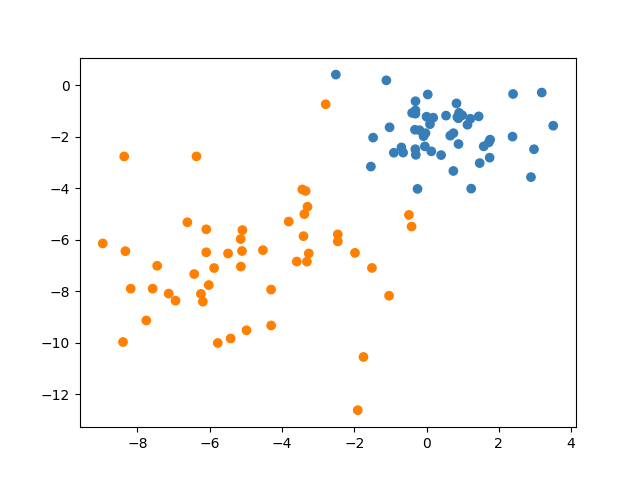

In [90]:
plt.scatter(Xtest[:,0],Xtest[:,1], color=colors[varied[1][1000:1100]])

<IPython.core.display.Javascript object>


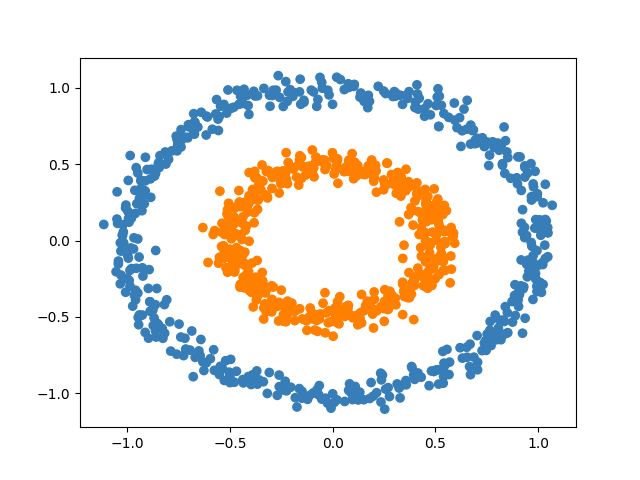

In [93]:
noisy_circles = datasets.make_circles(1100, factor=.5, noise=.05)
Xtrain=np.array([noisy_circles[0][:1000,0],noisy_circles[0][:1000,1]]).T
Ytrain=np.array(noisy_circles[1][:1000])
Xtest=np.array([noisy_circles[0][1000:1100,0],noisy_circles[0][1000:1100,1]]).T
Ytest=np.array(noisy_circles[1][1000:1100])

plt.scatter(Xtrain[:,0],Xtrain[:,1], color=colors[noisy_circles[1][:1000]])

<IPython.core.display.Javascript object>


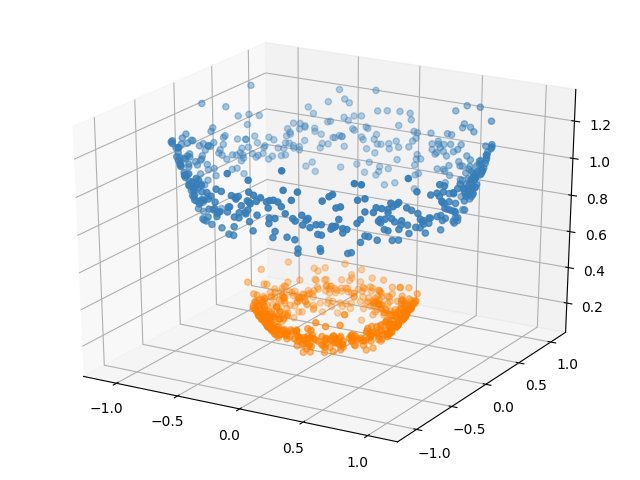

In [95]:
from mpl_toolkits.mplot3d import axes3d, Axes3D 
fig = plt.figure()
ax = Axes3D(fig)
Xtraind3=np.power(Xtrain[:,0],2)+np.power(Xtrain[:,1],2)
ax.scatter(Xtrain[:,0],Xtrain[:,1], Xtraind3, color=colors[noisy_circles[1][:1000]])

<IPython.core.display.Javascript object>


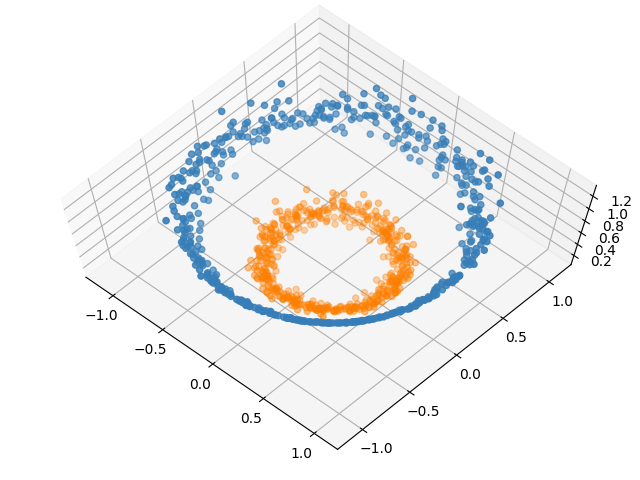

In [99]:
fig = plt.figure()
ax = Axes3D(fig)
Xtraind3=np.power(Xtrain[:,0],2)+np.power(Xtrain[:,1],2)
ax.scatter(Xtrain[:,0],Xtrain[:,1], Xtraind3, color=colors[noisy_circles[1][:1000]])

In [117]:
model = svm.SVC(kernel='linear', C=1) 
model.fit(Xtrain, Ytrain)
print("F-measure train:",f1_score(model.predict(Xtrain),Ytrain))
print("F-measure predict:",f1_score(model.predict(Xtest),Ytest))

F-measure train: 0.59478885894
F-measure predict: 0.571428571429


In [120]:
model = svm.SVC(kernel='linear', C=1) 
model.fit(np.array([Xtrain[:,0],Xtrain[:,1], Xtraind3]).T, Ytrain)
print("F-measure train:",f1_score(model.predict(np.array([Xtrain[:,0],Xtrain[:,1], Xtraind3]).T),Ytrain))
Xtestd3=np.power(Xtest[:,0],2)+np.power(Xtest[:,1],2)
print("F-measure predict:",f1_score(model.predict(np.array([Xtest[:,0],Xtest[:,1], Xtestd3]).T),Ytest))


F-measure train: 1.0
F-measure predict: 1.0


In [121]:
model = svm.SVC(kernel='rbf', C=1) 
model.fit(Xtrain, Ytrain)
print("F-measure train:",f1_score(model.predict(Xtrain),Ytrain))
print("F-measure predict:",f1_score(model.predict(Xtest),Ytest))

F-measure train: 1.0
F-measure predict: 1.0
